# 非线性回归

In [1]:
import tensorflow as tf

D:\Anaconda3\envs\TensorFlow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\TensorFlow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\TensorFlow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\TensorFlow1\lib\site-packages\tensorflow\python\framework\dtypes.py:519: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

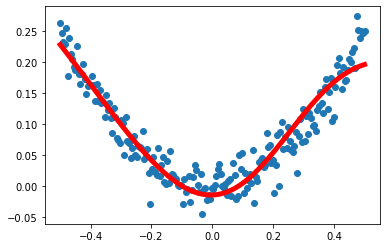

In [3]:
# 生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))                        
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1                       
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义神将网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)#预测

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
                        
with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
                        
        #获取预测值
        prediction_value = sess.run(prediction,feed_dict={x:x_data})
#画图
        
plt.figure()
plt.scatter(x_data,y_data)
plt.plot(x_data,prediction_value,'r-',lw=5)
plt.show()

# 手写识别

In [10]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [11]:
#数据集下载

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
#载入数据
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [21]:

#每个批次的大小(可修改)
batch_size = 100
#计算有多少个批次
n_batch = mnist.train.num_examples // batch_size

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

#创建一个简单的神经网络
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))#可修改隐藏层，如加100个神经元，如改成sigmoid函数
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

#二次代价函数 （可改成交叉熵）
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法 （可以改学习率0.2）（改成其他优化方式）
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

#初始化变量
init = tf.global_variables_initializer()

#结果放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))#argmax返回一维张量中最大的值所在的位置
#求准确率
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):#可修改训练次数
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
            
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print("Iter"+str(epoch)+", Testing Accuracy "+str(acc))

Iter0, Testing Accuracy 0.8315
Iter1, Testing Accuracy 0.871
Iter2, Testing Accuracy 0.8816
Iter3, Testing Accuracy 0.8875
Iter4, Testing Accuracy 0.8936
Iter5, Testing Accuracy 0.8968
Iter6, Testing Accuracy 0.8994
Iter7, Testing Accuracy 0.9016
Iter8, Testing Accuracy 0.9033
Iter9, Testing Accuracy 0.9051
Iter10, Testing Accuracy 0.906
Iter11, Testing Accuracy 0.9066
Iter12, Testing Accuracy 0.9081
Iter13, Testing Accuracy 0.9097
Iter14, Testing Accuracy 0.9091
Iter15, Testing Accuracy 0.9105
Iter16, Testing Accuracy 0.9114
Iter17, Testing Accuracy 0.9123
Iter18, Testing Accuracy 0.9129
Iter19, Testing Accuracy 0.9134
Iter20, Testing Accuracy 0.9143
